# Uso de la Librería `os` en Python


La librería `os` proporciona una interfaz para interactuar con el sistema operativo, lo que permite a los desarrolladores realizar tareas como:

- **Gestión de Archivos y Directorios**: Listar, crear y manipular archivos y directorios que contienen conjuntos de datos de entrenamiento y prueba.
- **Interacción con el Entorno**: Obtener información sobre el sistema, acceder a variables de entorno y gestionar configuraciones específicas del proyecto.
- **Ejecutar Procesos**: Facilitar la ejecución de scripts y la gestión de procesos en segundo plano, permitiendo un desarrollo más eficiente y organizado.

## 1. Exploración y Gestión de Archivos y Directorios


### 1.1 Listar Archivos en un Directorio

La función `os.listdir()` permite listar todos los archivos en un directorio especificado. A continuación, crearemos una función para listar los archivos en un directorio dado.

In [1]:
!pwd

/content


In [2]:
import os

def listar_archivos_en_directorio(path):
    archivos = os.listdir(path)
    return archivos

In [4]:
# Usa la función anterior
# ruta relativa "./dataset"
# ruta absoluta "/content/dataset"
path = "../content/dataset"
listar_archivos_en_directorio(path)

[]

### 1.2 Filtrar Archivos por Extensión

A menudo es necesario filtrar archivos por extensión.

In [5]:
def filtrar_archivos_por_extension(path, extension):
    archivos = [f for f in os.listdir(path) if f.endswith(extension)]
    return archivos

In [7]:
# Usa la función anterior
path = "/content/dataset/test"
extension = "png"
filtrar_archivos_por_extension(path, extension)

['02.png', '01.png']

In [8]:
# Crea la función "filtrar_imagenes" que permita filtrar todos los archivos que son .png y .jpg
def filtrar_imagenes(path):
  jpg = filtrar_archivos_por_extension(path, "jpg")
  png = filtrar_archivos_por_extension(path, "png")
  return jpg,png

In [9]:
path = "/content/dataset/test"
filtrar_imagenes(path)

(['03.jpg'], ['02.png', '01.png'])

### 1.3 Crear carpeta para almacenar resultados

Es comun crear directorios para almacenar los resultados de modelos entrenados, predicciones o visualizaciones.

In [10]:
def crear_directorio(path):
    if not os.path.exists(path):
        os.makedirs(path)
    print(f"Directorio '{path}' creado o ya existente.")

In [11]:
path = "/content/dataset/scr"
crear_directorio(path)

Directorio '/content/dataset/scr' creado o ya existente.


### 1.4 Para leer variables de entorno configuradas

En caso de datos sensibles como `API_KEY` o `Token` privados

In [12]:
def obtener_variable_entorno(variable):
    valor = os.getenv(variable)
    if valor:
        print(f"{variable}: {valor}")
    else:
        print(f"La variable de entorno {variable} no está definida.")

In [13]:
# Creando una variable de entorno
os.environ['TEST'] = 'valor'

In [14]:
variable = 'TEST'
obtener_variable_entorno(variable)

TEST: valor


## 2. Preprocesamiento en bloques

Esto se aplica cuando se requiere hacer los mismos cambios a todas las imágenes del conjunto de datos

### 2.1. Redimencionamiento

In [15]:
import os
import cv2
import matplotlib.pyplot as plt

def preprocesar_imagenes_cv2(directorio_origen, directorio_destino, nuevo_tamaño):
    crear_directorio(directorio_destino)

    for archivo in os.listdir(directorio_origen):
        if archivo.endswith('.jpg') or archivo.endswith('.png'):
            ruta_completa = os.path.join(directorio_origen, archivo)

            imagen = cv2.imread(ruta_completa)

            if imagen is None:
                print(f"No se pudo leer la imagen {archivo}.")
                continue

            imagen_redimensionada = cv2.resize(imagen, nuevo_tamaño)

            cv2.imwrite(os.path.join(directorio_destino, archivo), imagen_redimensionada)
            print(f"Imagen {archivo} redimensionada y guardada.")

In [16]:
# Usar la función anterior
# Nuevo tamaño es una tupla ejemplo (128, 128)
directorio_origen = "/content/dataset/test"
directorio_destino = "/content/dataset/scr"
nuevo_tamaño = (128, 128)
preprocesar_imagenes_cv2(directorio_origen, directorio_destino, nuevo_tamaño)

Directorio '/content/dataset/scr' creado o ya existente.
Imagen 03.jpg redimensionada y guardada.
Imagen 02.png redimensionada y guardada.
Imagen 01.png redimensionada y guardada.


### 2.2 Mostrar imágen aleatoria

In [17]:
import random

def mostrar_imagen_aleatoria(directorio_base):
    conjunto = random.choice(['train', 'test'])
    directorio = os.path.join(directorio_base, conjunto)

    imagenes = os.listdir(directorio) # Verificar que todos los archivos sean imágenes
    if not imagenes:
        print(f"No hay imágenes en el directorio {directorio}.")
        return

    imagen_aleatoria = random.choice(imagenes)
    ruta_imagen = os.path.join(directorio, imagen_aleatoria)

    imagen = cv2.imread(ruta_imagen)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    plt.imshow(imagen_rgb)
    plt.title(f"Imagen aleatoria de {conjunto}: {imagen_aleatoria}")
    plt.show()

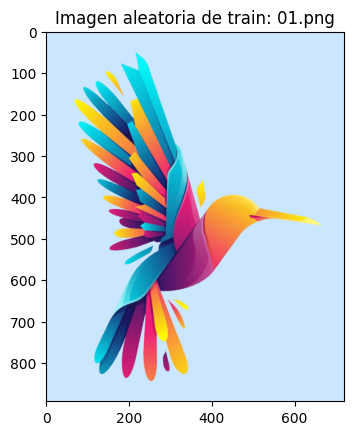

In [18]:
mostrar_imagen_aleatoria("/content/dataset")